## Lista 01 - Aprendizagem Automática
- Aluno: José Renato da Silva Freitas

In [10]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [15]:
def get_mse(atual, predito):
  erro = atual - predito
  erro_2 = np.square(erro)
  return erro_2.mean()


def get_custo(actual, predicted):
  erro = actual - predicted
  erro_2 = np.square(erro)
  return erro_2.mean()/2



### Questão 1.a - Regressão Linear com OLS

Parâmetros do modelo: [0.02780853 1.50044521 0.18614309]
RMSE: 0.45238337654040534
MSE: 0.10232535968504909
MSE: 0.20465071937009818


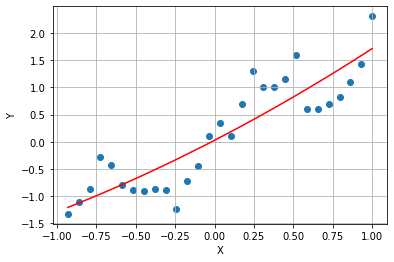

In [123]:
dataset = np.genfromtxt("./artificial1d.csv", delimiter=',', skip_header=1)

x_treino = dataset[:,0]
Y = dataset[:, 1] # saía
n = len(Y)

X = np.c_[np.ones(n), x_treino, [x**2 for x in x_treino]]

w = np.linalg.inv(X.T @ X) @ X.T @ Y

y_predito = X @ w

print(f'Parâmetros do modelo: {w}')

rmse = ( (1/n) * np.sum( (Y - y_predito)**2 ) )**0.5
print(f'RMSE: {rmse}')

mse = np.sum( (Y - y_predito)**2 )/(2*n)
_mse = get_mse(Y, y_predito)
print(f'MSE: {mse}')
print(f'MSE: {_mse}')

# Reta resultante OLS
plt.grid()
plt.scatter(dataset[:, 0], Y)
plt.plot(dataset[:, 0], y_predito, color='red')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Questão 1.b Regressão Linear com Gradiente Descendente

In [201]:
t = 0
epocas = 1000
alfa = 0.01 #taxa de aprendizado
w0 = 0
w1_ = 0

df = np.genfromtxt("./artificial1d.csv", delimiter=',', skip_header=1)

X = df[:,0] # entrada
Y = df[:,1] # saía
N = Y.shape[0] # tamanho da entrada

historico_do_custo = []

while t <= epocas:
    t = t + 1
    y_chapey = w0 + w1_ * X  # y_chapeu ou y atual 
    erro = Y - y_chapey # calcular os erros do modelo
    
    # custo = np.sum(erro**2) / (2*N) # a cada iteração eu obtenho um novo custo = MSE
    custo = get_custo(Y, y_chapey)
    
    w0 = w0 + ( alfa * (np.sum(erro)/N) ) # atualizar os parâmetros
    w1_ = w1_ + ( alfa * (np.sum(erro*X)/N ) )
    
    historico_do_custo.append([t, custo])
    
df_historico_do_custo = pd.DataFrame(data=historico_do_custo, columns=['t','c'])

# MSE
y_predito = w0 + w1_ * X
mse = np.sum( (Y - y_predito)**2 )/(2*N)

print(f'Parâmetros do modelo: [{w0}, {w1_}]')
print(f'MSE: {mse}')

Parâmetros do modelo: [0.09232918673952156, 1.4595509655489893]
MSE: 0.10433720879860484


Text(0.5, 1.0, 'Reta resultante GD')

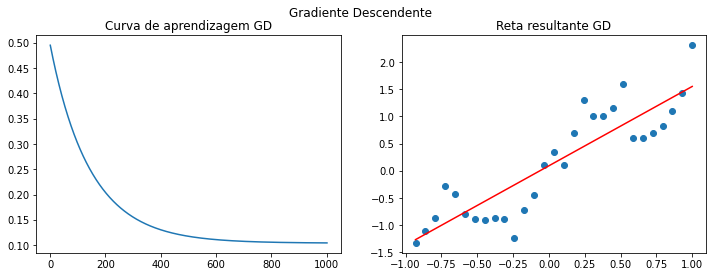

In [202]:
# Curva de aprendizagem GD
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Gradiente Descendente")
fig.set_figwidth(12)

ax1.plot(df_historico_do_custo['t'], df_historico_do_custo['c'])
ax1.set_title("Curva de aprendizagem GD")

# Reta resultante GD
y_predito = w0 + w1_ * X
ax2.scatter(df[:,0], df[:,1])
ax2.plot(df[:,0], y_predito, color='red')
ax2.set_title("Reta resultante GD")


### Questão 1.c - Regressão Linear com Gradiente Descendente Estocástico (SGD)

Parâmetros do modelo: [0.06233816604743338, 1.4934399284291275]
MSE: 0.2086222584131955


Text(0.5, 1.0, 'Reta resultante GD')

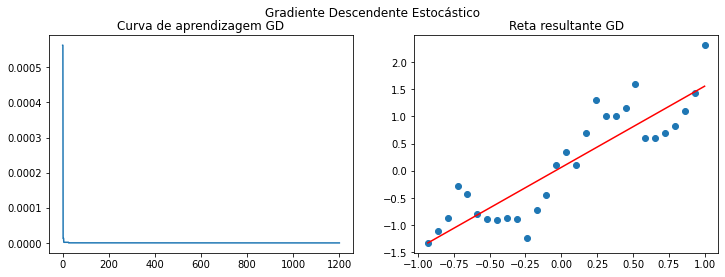

In [203]:
df = np.genfromtxt("./artificial1d.csv", delimiter=',', skip_header=1)
alfa = 0.1
epoca = 0
w0_ = 0
w1_ = 0
custo = []
historico_do_custo_sgd = []
n =df[:,1].shape[0]
while epoca <= 1200:
    dfp = np.random.permutation(df)
    for xi, yi in zip(dfp[:,0], dfp[:,1]):
        y_chapeu = w0_ + (w1_ * xi)  # y_chapeu ou y_atual
        erro = yi - y_chapeu # calcular os erros do modelo
        
        # custo.append(np.sum(erro**2) / (2*n)) # a cada iteração eu obtenho um novo custo = MSE
        custo.append(get_custo(yi, y_chapeu))
        
        w0_ = w0_ +  alfa * erro  # atualizar os parâmetros
        w1_ = w1_ +  alfa * erro * xi
    historico_do_custo_sgd.append([epoca, min(custo)])
    epoca = epoca + 1
    
df_historico_do_custo_sgd = pd.DataFrame(data=historico_do_custo_sgd, columns=['t','c'])

# MSE
y_predito = w0_ + w1_* df[:,0]
print(f'Parâmetros do modelo: [{w0_}, {w1_}]')
print(f'MSE: {get_mse(df[:,1], y_predito)}')
# Curva de aprendizagem GD
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Gradiente Descendente Estocástico")
fig.set_figwidth(12)
ax1.plot(df_historico_do_custo_sgd['t'], df_historico_do_custo_sgd['c'])
ax1.set_title("Curva de aprendizagem GD")
# Reta resultante GD
ax2.scatter(df[:,0], df[:,-1])
ax2.plot(df[:,0], y_predito, color='red')
ax2.set_title("Reta resultante GD")

## Questão 2

In [204]:
df = np.genfromtxt("./artificial1d.csv", delimiter=',', skip_header=1)


def normaliza(dataset, coluna, x):
  "Normalização usando MinMax"
  min = np.min(dataset[:, coluna])
  max = np.max(dataset[:, coluna])
  return (x - min)/(max - min)


# Normaliza os dados usando o scalar MinMax
dataset_normalizado = np.c_[ [normaliza(df,0,x) for x in df[:,0]],
               [normaliza(df,1,x) for x in df[:,1]]
                ]

# Separa os dados em treino e teste
msk = np.random.rand(len(dataset_normalizado)) < 0.7 # cria uma mascara com as posicoes
dados_treino = dataset_normalizado[msk]
dados_teste = dataset_normalizado[~msk]

print(f'Dados de Treino: {dados_treino.shape}')
print(f'Dados de Teste: {dados_teste.shape}')

Dados de Treino: (21, 2)
Dados de Teste: (8, 2)


Text(0.5, 1.0, 'Teste P = 1')

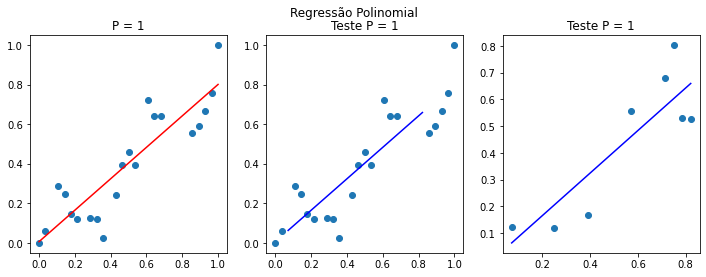

In [217]:
"Polinômio Grau 1"
x_treino = dados_treino[:, 0]
y = dados_treino[:, 1]
n = len(y)

# Treinando
X = np.c_[np.ones(n), x_treino ]
xtx = X.T @ X
xty = X.T @ y
W = np.linalg.inv(xtx) @ xty
y_predito = X @ W; 


# Testando
x_teste = dados_teste[:, 0]
y_teste = dados_teste[:, 1]
n_teste = len(y_teste)

X_TESTE = np.c_[np.ones(n_teste), x_teste ]
y_predito_teste = X_TESTE @ W


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Regressão Polinomial")
fig.set_figwidth(12)
# Treino
ax1.scatter(x_treino, y)
ax1.plot(x_treino, y_predito, color='red')
ax1.set_title("P = 1")
# Teste
ax2.scatter(x_treino, y)
ax2.plot(x_teste, y_predito_teste, color='blue')
ax2.set_title("Teste P = 1")
# Teste
ax3.scatter(x_teste, y_teste)
ax3.plot(x_teste, y_predito_teste, color='blue')
ax3.set_title("Teste P = 1")

Text(0.5, 1.0, 'P = 2')

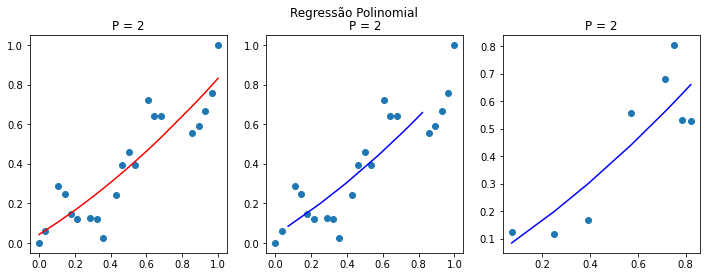

In [218]:
"Polinômio Grau 2"
x_treino = dados_treino[:, 0]
y = dados_treino[:, 1]
n = len(y)

# Treinando
X = np.c_[np.ones(n), x_treino, [x**2 for x in x_treino] ]
xtx = X.T @ X
xty = X.T @ y
W = np.linalg.inv(xtx) @ xty
y_predito = X @ W; 


# Testando
x_teste = dados_teste[:, 0]
y_teste = dados_teste[:, 1]
n_teste = len(y_teste)

X_TESTE = np.c_[np.ones(n_teste), x_teste, [x**2 for x in x_teste] ]
y_predito_teste = X_TESTE @ W


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Regressão Polinomial")
fig.set_figwidth(12)
# Treino
ax1.scatter(x_treino, y)
ax1.plot(x_treino, y_predito, color='red')
ax1.set_title("P = 2")
# Teste
ax2.scatter(x_treino, y)
ax2.plot(x_teste, y_predito_teste, color='blue')
ax2.set_title("P = 2")
# Teste
ax3.scatter(x_teste, y_teste)
ax3.plot(x_teste, y_predito_teste, color='blue')
ax3.set_title("P = 2")

Text(0.5, 1.0, 'P = 3')

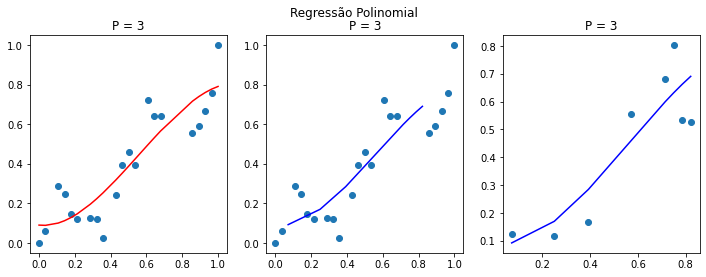

In [206]:
"Polinômio Grau 3"
x_treino = dados_treino[:, 0]
y = dados_treino[:, 1]
n = len(y)

# Treinando
X = np.c_[np.ones(n), x_treino, [x**2 for x in x_treino], [x**3 for x in x_treino] ]
xtx = X.T @ X
xty = X.T @ y
W = np.linalg.inv(xtx) @ xty
y_predito = X @ W; 


# Testando
x_teste = dados_teste[:, 0]
y_teste = dados_teste[:, 1]
n_teste = len(y_teste)

X_TESTE = np.c_[np.ones(n_teste), x_teste, [x**2 for x in x_teste], [x**3 for x in x_teste] ]
y_predito_teste = X_TESTE @ W


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Regressão Polinomial")
fig.set_figwidth(12)
# Treino
ax1.scatter(x_treino, y)
ax1.plot(x_treino, y_predito, color='red')
ax1.set_title("P = 3")
# Teste
ax2.scatter(x_treino, y)
ax2.plot(x_teste, y_predito_teste, color='blue')
ax2.set_title("P = 3")
# Teste
ax3.scatter(x_teste, y_teste)
ax3.plot(x_teste, y_predito_teste, color='blue')
ax3.set_title("P = 3")

Text(0.5, 1.0, 'P = 4')

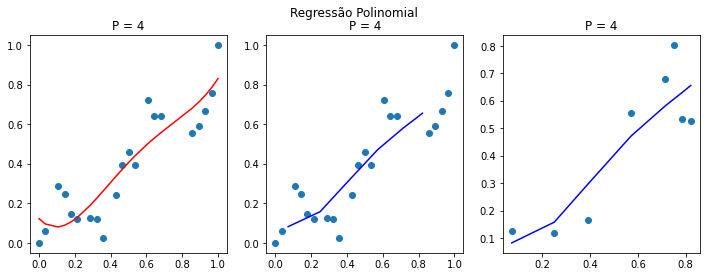

In [213]:
"Polinômio Grau 4"
x_treino = dados_treino[:, 0]
y = dados_treino[:, 1]
n = len(y)

# Treinando
X = np.c_[np.ones(n), x_treino, 
          [x**2 for x in x_treino], 
          [x**3 for x in x_treino], 
          [x**4 for x in x_treino]]
xtx = X.T @ X
xty = X.T @ y
W = np.linalg.inv(xtx) @ xty
y_predito = X @ W; 


# Testando
x_teste = dados_teste[:, 0]
y_teste = dados_teste[:, 1]
n_teste = len(y_teste)

X_TESTE = np.c_[np.ones(n_teste), x_teste, 
          [x**2 for x in x_teste], 
          [x**3 for x in x_teste], 
          [x**4 for x in x_teste]]
y_predito_teste = X_TESTE @ W


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Regressão Polinomial")
fig.set_figwidth(12)
# Treino
ax1.scatter(x_treino, y)
ax1.plot(x_treino, y_predito, color='red')
ax1.set_title("P = 4")
# Teste
ax2.scatter(x_treino, y)
ax2.plot(x_teste, y_predito_teste, color='blue')
ax2.set_title("P = 4")
# Teste
ax3.scatter(x_teste, y_teste)
ax3.plot(x_teste, y_predito_teste, color='blue')
ax3.set_title("P = 4")


Text(0.5, 1.0, 'P = 5')

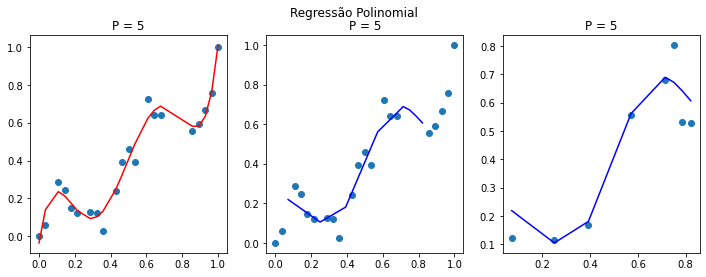

In [219]:
"Polinômio Grau 5"
x_treino = dados_treino[0:100, 0]
y = dados_treino[0:100, 1]
n = len(y)

X = np.c_[np.ones(n), x_treino, 
          [x**2 for x in x_treino], 
          [x**3 for x in x_treino], 
          [x**4 for x in x_treino], 
          [x**5 for x in x_treino] ]

xtx = X.T @ X
xty = X.T @ y
W = np.linalg.inv(xtx) @ xty

y_predito = X @ W; 

# Testando
x_teste = dados_teste[:, 0]
y_teste = dados_teste[:, 1]
n_teste = len(y_teste)

X_TESTE = np.c_[np.ones(n_teste), x_teste, 
          [x**2 for x in x_teste], 
          [x**3 for x in x_teste], 
          [x**4 for x in x_teste],
          [x**5 for x in x_teste]]
y_predito_teste = X_TESTE @ W

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Regressão Polinomial")
fig.set_figwidth(12)
# Treino
ax1.scatter(x_treino, y)
ax1.plot(x_treino, y_predito, color='red')
ax1.set_title("P = 5")
# Teste
ax2.scatter(x_treino, y)
ax2.plot(x_teste, y_predito_teste, color='blue')
ax2.set_title("P = 5")
# Teste
ax3.scatter(x_teste, y_teste)
ax3.plot(x_teste, y_predito_teste, color='blue')
ax3.set_title("P = 5")


Text(0.5, 1.0, 'P = 6')

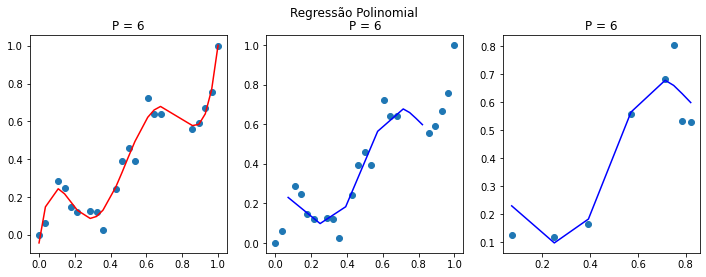

In [220]:
"Polinômio Grau 6"
x_treino = dados_treino[0:100, 0]
y = dados_treino[0:100, 1]
n = len(y)

X = np.c_[np.ones(n), x_treino, 
          [x**2 for x in x_treino], 
          [x**3 for x in x_treino], 
          [x**4 for x in x_treino], 
          [x**5 for x in x_treino],
          [x**6 for x in x_treino] ]

xtx = X.T @ X
xty = X.T @ y
W = np.linalg.inv(xtx) @ xty

y_predito = X @ W; 

# Testando
x_teste = dados_teste[:, 0]
y_teste = dados_teste[:, 1]
n_teste = len(y_teste)

X_TESTE = np.c_[np.ones(n_teste), x_teste, 
          [x**2 for x in x_teste], 
          [x**3 for x in x_teste], 
          [x**4 for x in x_teste],
          [x**5 for x in x_teste],
          [x**6 for x in x_teste]]
y_predito_teste = X_TESTE @ W

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Regressão Polinomial")
fig.set_figwidth(12)
# Treino
ax1.scatter(x_treino, y)
ax1.plot(x_treino, y_predito, color='red')
ax1.set_title("P = 6")
# Teste
ax2.scatter(x_treino, y)
ax2.plot(x_teste, y_predito_teste, color='blue')
ax2.set_title("P = 6")
# Teste
ax3.scatter(x_teste, y_teste)
ax3.plot(x_teste, y_predito_teste, color='blue')
ax3.set_title("P = 6")

Text(0.5, 1.0, 'P = 7')

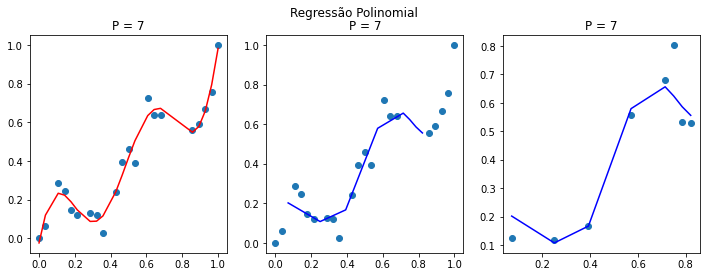

In [221]:
"Polinômio Grau 7"
x_treino = dados_treino[:, 0]
y = dados_treino[:, 1]
n = len(y)

X = np.c_[np.ones(n), x_treino, 
          [x**2 for x in x_treino], 
          [x**3 for x in x_treino], 
          [x**4 for x in x_treino], 
          [x**5 for x in x_treino],
          [x**6 for x in x_treino],
          [x**7 for x in x_treino] ]

xtx = X.T @ X
xty = X.T @ y
W = np.linalg.inv(xtx) @ xty

y_predito = X @ W; 

# Testando
x_teste = dados_teste[:, 0]
y_teste = dados_teste[:, 1]
n_teste = len(y_teste)

X_TESTE = np.c_[np.ones(n_teste), x_teste, 
          [x**2 for x in x_teste], 
          [x**3 for x in x_teste], 
          [x**4 for x in x_teste],
          [x**5 for x in x_teste],
          [x**6 for x in x_teste],
          [x**7 for x in x_teste]]
y_predito_teste = X_TESTE @ W

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Regressão Polinomial")
fig.set_figwidth(12)
# Treino
ax1.scatter(x_treino, y)
ax1.plot(x_treino, y_predito, color='red')
ax1.set_title("P = 7")
# Teste
ax2.scatter(x_treino, y)
ax2.plot(x_teste, y_predito_teste, color='blue')
ax2.set_title("P = 7")
# Teste
ax3.scatter(x_teste, y_teste)
ax3.plot(x_teste, y_predito_teste, color='blue')
ax3.set_title("P = 7")

Text(0.5, 1.0, 'P = 8')

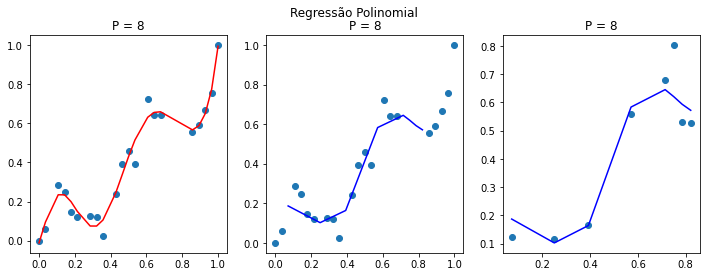

In [222]:
"Polinômio Grau 8"
x_treino = dados_treino[:, 0]
y = dados_treino[:, 1]
n = len(y)

X = np.c_[np.ones(n), x_treino, 
          [x**2 for x in x_treino], 
          [x**3 for x in x_treino], 
          [x**4 for x in x_treino], 
          [x**5 for x in x_treino],
          [x**6 for x in x_treino],
          [x**7 for x in x_treino],
          [x**8 for x in x_treino] ]

xtx = X.T @ X
xty = X.T @ y
W = np.linalg.inv(xtx) @ xty

y_predito = X @ W; 

# Testando
x_teste = dados_teste[:, 0]
y_teste = dados_teste[:, 1]
n_teste = len(y_teste)

X_TESTE = np.c_[np.ones(n_teste), x_teste, 
          [x**2 for x in x_teste], 
          [x**3 for x in x_teste], 
          [x**4 for x in x_teste],
          [x**5 for x in x_teste],
          [x**6 for x in x_teste],
          [x**7 for x in x_teste],
          [x**8 for x in x_teste]]
y_predito_teste = X_TESTE @ W

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Regressão Polinomial")
fig.set_figwidth(12)
# Treino
ax1.scatter(x_treino, y)
ax1.plot(x_treino, y_predito, color='red')
ax1.set_title("P = 8")
# Teste
ax2.scatter(x_treino, y)
ax2.plot(x_teste, y_predito_teste, color='blue')
ax2.set_title("P = 8")
# Teste
ax3.scatter(x_teste, y_teste)
ax3.plot(x_teste, y_predito_teste, color='blue')
ax3.set_title("P = 8")

Text(0.5, 1.0, 'P = 9')

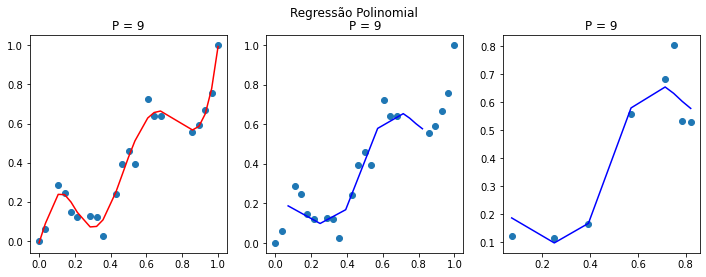

In [223]:
"Polinômio Grau 9"
x_treino = dados_treino[:, 0]
y = dados_treino[:, 1]
n = len(y)

X = np.c_[np.ones(n), x_treino, 
          [x**2 for x in x_treino], 
          [x**3 for x in x_treino], 
          [x**4 for x in x_treino], 
          [x**5 for x in x_treino],
          [x**6 for x in x_treino],
          [x**7 for x in x_treino],
          [x**8 for x in x_treino],
          [x**9 for x in x_treino] ]

xtx = X.T @ X
xty = X.T @ y
W = np.linalg.inv(xtx) @ xty

y_predito = X @ W; 

# Testando
x_teste = dados_teste[:, 0]
y_teste = dados_teste[:, 1]
n_teste = len(y_teste)

X_TESTE = np.c_[np.ones(n_teste), x_teste, 
          [x**2 for x in x_teste], 
          [x**3 for x in x_teste], 
          [x**4 for x in x_teste],
          [x**5 for x in x_teste],
          [x**6 for x in x_teste],
          [x**7 for x in x_teste],
          [x**8 for x in x_teste],
          [x**9 for x in x_teste]]
y_predito_teste = X_TESTE @ W

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Regressão Polinomial")
fig.set_figwidth(12)
# Treino
ax1.scatter(x_treino, y)
ax1.plot(x_treino, y_predito, color='red')
ax1.set_title("P = 9")
# Teste
ax2.scatter(x_treino, y)
ax2.plot(x_teste, y_predito_teste, color='blue')
ax2.set_title("P = 9")
# Teste
ax3.scatter(x_teste, y_teste)
ax3.plot(x_teste, y_predito_teste, color='blue')
ax3.set_title("P = 9")

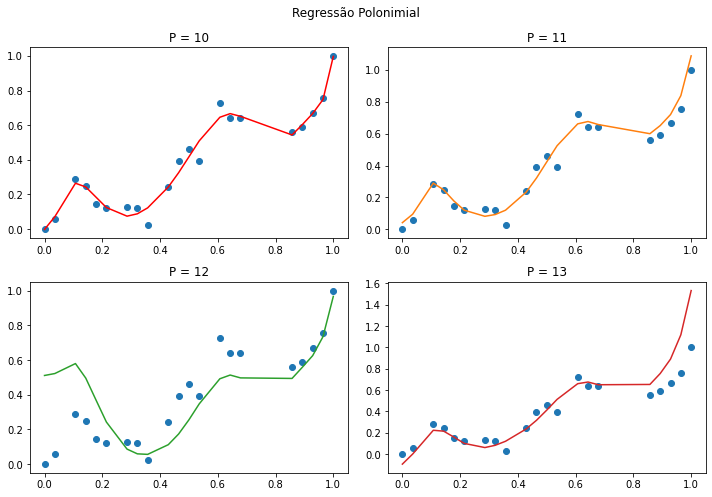

In [225]:
"Polinômio Grau 10, 11, 12 e 13"
x_treino = dados_treino[:, 0]
y = dados_treino[:, 1]
n = len(y)

X = np.c_[np.ones(n), x_treino, 
          [x**2 for x in x_treino], 
          [x**3 for x in x_treino], 
          [x**4 for x in x_treino], 
          [x**5 for x in x_treino],
          [x**6 for x in x_treino],
          [x**7 for x in x_treino],
          [x**8 for x in x_treino],
          [x**9 for x in x_treino],
          [x**10 for x in x_treino] ]

xtx = X.T @ X
xty = X.T @ y
W = np.linalg.inv(xtx) @ xty

y_predito = X @ W; 

# p = 11
X11 = np.c_[np.ones(n), x_treino, 
          [x**2 for x in x_treino], 
          [x**3 for x in x_treino], 
          [x**4 for x in x_treino], 
          [x**5 for x in x_treino],
          [x**6 for x in x_treino],
          [x**7 for x in x_treino],
          [x**8 for x in x_treino],
          [x**9 for x in x_treino],
          [x**10 for x in x_treino],
          [x**11 for x in x_treino] ]

xtx = X11.T @ X11
xty = X11.T @ y
W11 = np.linalg.inv(xtx) @ xty

y_predito11 = X11 @ W11; 


# p = 12
X12 = np.c_[np.ones(n), x_treino, 
          [x**2 for x in x_treino], 
          [x**3 for x in x_treino], 
          [x**4 for x in x_treino], 
          [x**5 for x in x_treino],
          [x**6 for x in x_treino],
          [x**7 for x in x_treino],
          [x**8 for x in x_treino],
          [x**9 for x in x_treino],
          [x**10 for x in x_treino],
          [x**11 for x in x_treino],
          [x**12 for x in x_treino] ]

xtx = X12.T @ X12
xty = X12.T @ y
W12 = np.linalg.inv(xtx) @ xty

y_predito12 = X12 @ W12; 


# p = 13
X13 = np.c_[np.ones(n), x_treino, 
          [x**2 for x in x_treino], 
          [x**3 for x in x_treino], 
          [x**4 for x in x_treino], 
          [x**5 for x in x_treino],
          [x**6 for x in x_treino],
          [x**7 for x in x_treino],
          [x**8 for x in x_treino],
          [x**9 for x in x_treino],
          [x**10 for x in x_treino],
          [x**11 for x in x_treino],
          [x**13 for x in x_treino] ]

xtx = X13.T @ X13
xty = X13.T @ y
W13 = np.linalg.inv(xtx) @ xty

y_predito13 = X13 @ W13; 

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Regressão Polonimial')
fig.set_figwidth(10)
fig.set_figheight(7)
ax1.scatter(x_treino, y)
ax1.plot(x_treino, y_predito, color='red')
ax1.set_title("P = 10")
ax2.scatter(x_treino, y)
ax2.plot(x_treino, y_predito11, 'tab:orange')
ax2.set_title("P = 11")
ax3.scatter(x_treino, y)
ax3.plot(x_treino, y_predito12, 'tab:green')
ax3.set_title("P = 12")
ax4.scatter(x_treino, y)
ax4.plot(x_treino, y_predito13, 'tab:red')
ax4.set_title("P = 13")
fig.tight_layout()
